##### Data Description:-

class: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [78]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import metrics

In [79]:
ds = pd.read_csv('mushrooms.csv')
ds

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Obsarvation:- All Given column in data set is categorical data, hence we need to first apply Encoding for this data set to convert it in numerical data.

In [80]:
loc = np.where(ds['stalk-root'] == '?') # finding the location where '?' are present
np.shape(loc) # total number of rows where '?' is present

(1, 2480)

##### Dealing with Null values in 'stalk-root' column

In the column 'stalk-root' of the dataset, there are 2480 missing values which are replaced with '?' sign. So, we replace these values with the most frequent values or mode for that column such that no missing values are present in ther dataset.

In [83]:
ds['stalk-root'].replace('?', np.nan, inplace = True) # replacing the '?' values with NaN values.
ds['stalk-root'].isnull().sum()

0

##### Obsarvation:- 
As we can see that the '?' values have been replaced with the NaN values in the stalk-root column. We can now replace these null values with the mode of the column using simple imputer.

In [84]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
ds['stalk-root'] = si.fit_transform(ds['stalk-root'].values.reshape(-1,1))
ds['stalk-root'].isnull().sum() # checking for the null values again.

0

In [85]:
ds.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### Obsarvation:-

All data type of Object, we wil ue lable encoder to encode data from Catagorical to numerical so that it can be processed by different classification model

<AxesSubplot:>

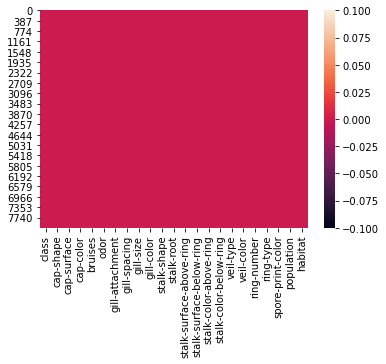

In [38]:
import seaborn as sns
sns.heatmap(ds.isnull())

# Obsarvation:- 
Data has no null value now

In [86]:
ds.shape

(8124, 23)

<AxesSubplot:>

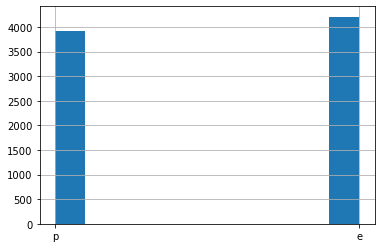

In [87]:
ds['class'].hist()

#### Obsarvation:- 

From the above plot, it is clear that the the dataset is balanced. Poisonous class of mushrooms have 3916 values and Edible class has values 4208. So the sampling of the data is not required.

In [67]:
ds.var()    # variance of the dataset

cap-shape                    2.573872
cap-surface                  1.512586
cap-color                    6.481204
bruises                      0.242900
odor                         4.425676
gill-attachment              0.025184
gill-spacing                 0.135432
gill-size                    0.213624
gill-color                  12.534142
stalk-shape                  0.245513
stalk-root                   1.125946
stalk-surface-above-ring     0.386212
stalk-surface-below-ring     0.456941
stalk-color-above-ring       3.616643
stalk-color-below-ring       3.637761
veil-type                    0.000000
veil-color                   0.058888
ring-number                  0.073476
ring-type                    3.246022
spore-print-color            5.677084
population                   1.567709
habitat                      2.958316
dtype: float64

##### Obsarvation:-

From the above values, we see that variance of column 'veil-type' is 0. So, all the values in this column are same. So this column can be dropped from the dataset as it will not help in the learning of the model.

In [68]:
ds.drop(['veil-type'], axis = 1, inplace = True)

<AxesSubplot:>

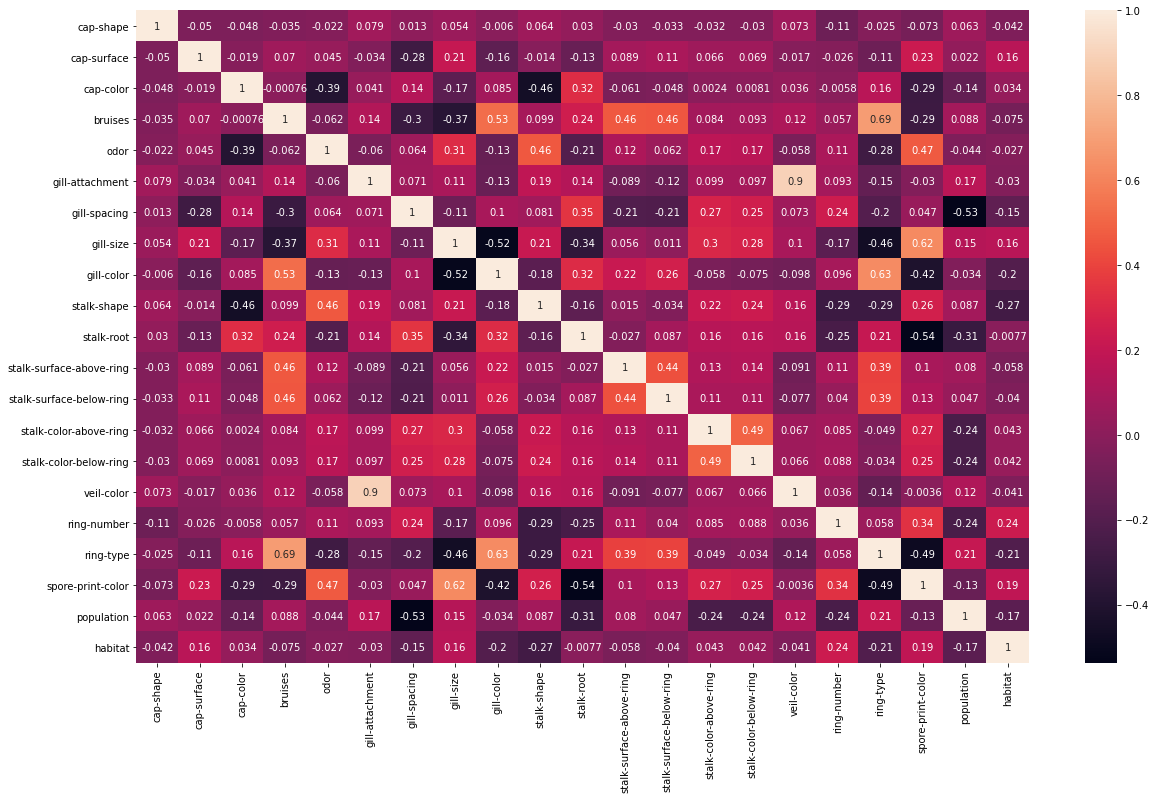

In [70]:
cor_mat = ds.corr()
cor_mat
plt.figure(figsize = (20, 12)) # changing the figure size so that we can analyse better
sns.heatmap(cor_mat, annot = True)

#### Obsarvation:-

From the above correlation matrix, we can check the between class and all the other features of the dataset.

Since the values were all categorical, so we donot check for the outliers and skewness of the features.

We can now proceed with spliting the data and fitting it into various models to check its performance and selecting the best model for the dataset.

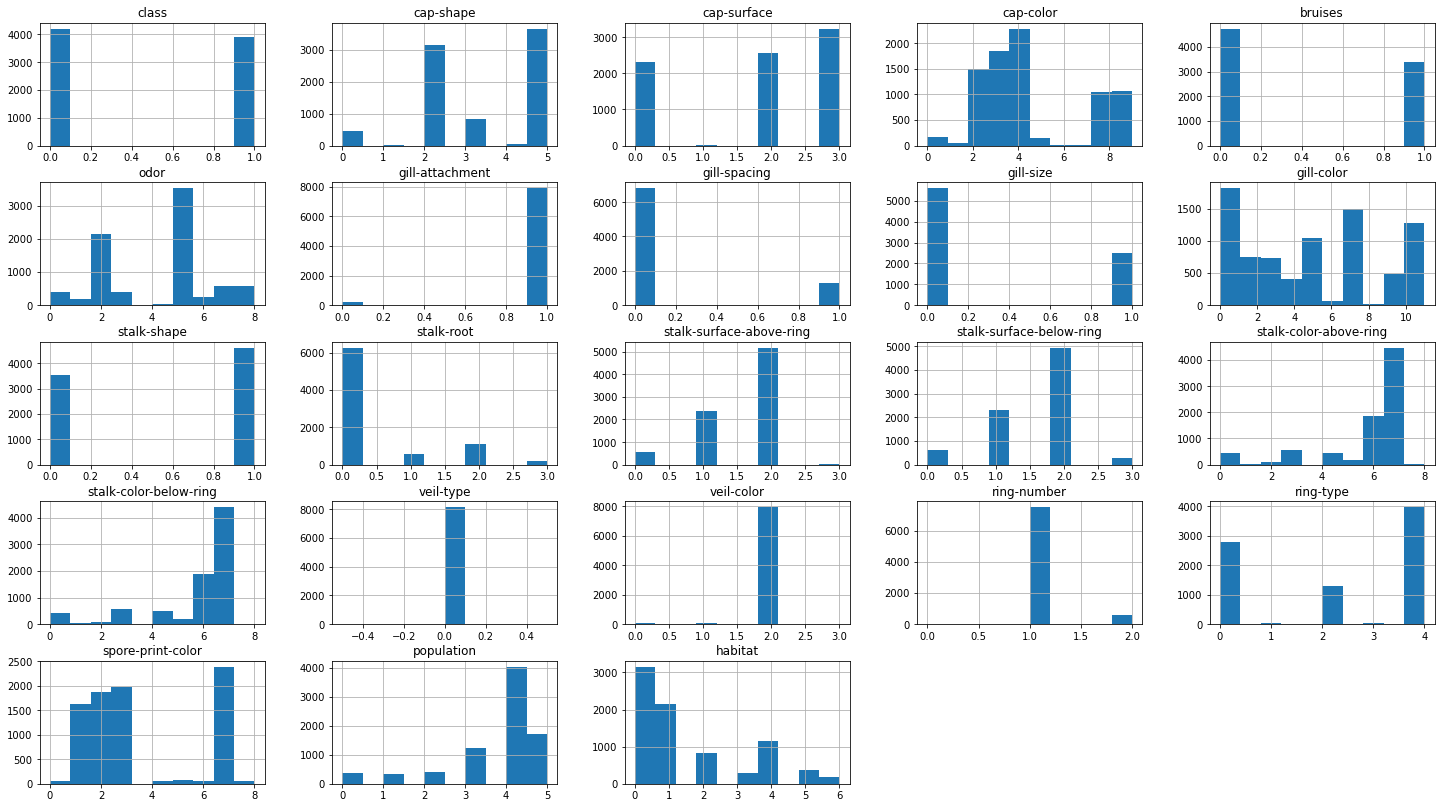

In [118]:
ds.hist(figsize=(25,14))
plt.show()

<AxesSubplot:title={'center':'cap Surface'}, xlabel='cap-surface', ylabel='count'>

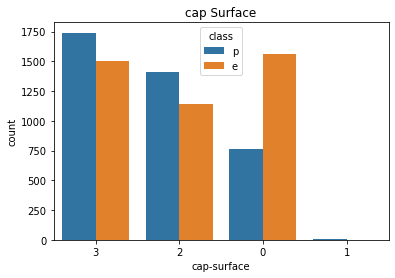

In [72]:
figsize=(15,8)

plt.title('cap Surface')
sns.countplot(data = ds, x='cap-surface',hue='class', order=ds['cap-surface'].value_counts().index,)

In [73]:
ds.groupby(['cap-surface'])['class'].value_counts()

cap-surface  class
0            e        1560
             p         760
1            p           4
2            p        1412
             e        1144
3            p        1740
             e        1504
Name: class, dtype: int64

<AxesSubplot:title={'center':'cap shape'}, xlabel='cap-shape', ylabel='count'>

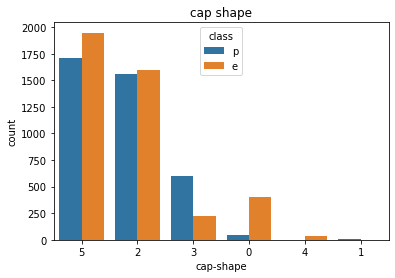

In [74]:
plt.title('cap shape')
sns.countplot(data = ds, x='cap-shape',hue='class', order=ds['cap-shape'].value_counts().index)

In [76]:
ds.groupby('cap-shape')['class'].value_counts()

cap-shape  class
0          e         404
           p          48
1          p           4
2          e        1596
           p        1556
3          p         600
           e         228
4          e          32
5          e        1948
           p        1708
Name: class, dtype: int64

### Obsarvetion:-
Mushroom which is having B gill-color is mostly poisnous


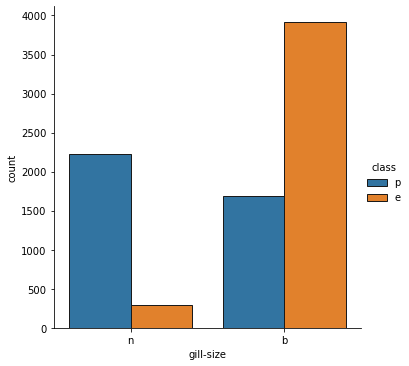

In [44]:
sns.catplot(x="gill-size", hue="class", kind="count",
             edgecolor="0.1",
            data=ds)

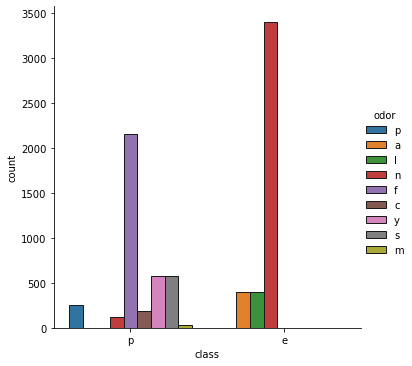

In [46]:
sns.catplot(x="class", hue="odor", kind="count",
             edgecolor="0.1",
            data=ds)

#### Obsarvaion:- 
On the bsis of odor, only three type of Mushrooms are edible, which haveing almond, anise and none odor,

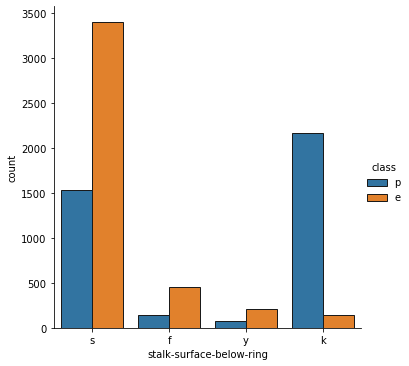

In [53]:
sns.catplot( x="stalk-surface-below-ring", hue="class",kind="count",
             edgecolor="0.1",
            data=ds)

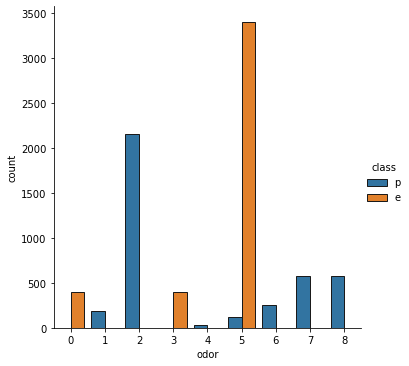

In [65]:
sns.catplot( x="odor", hue="class",kind="count",
             edgecolor="0.1",
            data=ds)

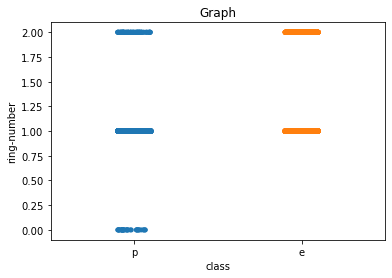

In [66]:
ax = sns.stripplot(x='class',y ='ring-number', data=ds)
plt.title('Graph')
plt.show()

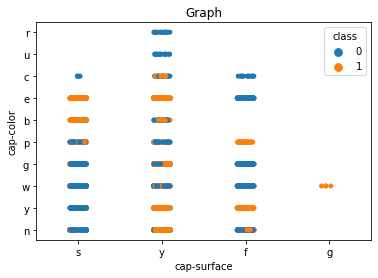

In [32]:
ax = sns.stripplot(x='odor',y ='cap-color', hue='class', data=ds)
plt.title('Graph')
plt.show()

### Obsarvation:-

There are two catagory which is poisonous (white and Yello), however white is also having eatable mushrooms, other two catagory(n and O ) are eatable.


In [89]:
le=LabelEncoder()
column = ds.columns
for val in column:
    ds[val]= le.fit_transform(ds[val].astype(str))  
    
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
#sns.pairplot(ds)

In [91]:
x = ds.drop('class', axis=1)
y=ds['class']

In [109]:
max_accuracy = 0
best_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best accuracy is {max_accuracy} and best random state is {best_rs}")

Best accuracy is 0.9684167350287121 and best random state is 54


# Obsarvation:-

Best Random state is 54, hence we will use it in model selection


In [110]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=.22,random_state=54)

In [111]:
model=[DecisionTreeClassifier(), SVC(),KNeighborsClassifier(),MultinomialNB(),LogisticRegression(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of", m, "is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is:
1.0
[[960   0]
 [  0 828]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00       828

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



Accuracy Score of SVC() is:
0.9927293064876958
[[958   2]
 [ 11 817]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       1.00      0.99      0.99       828

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Accuracy Score of KNeighborsClassifier() is:
1.0
[[960   0]
 [  0 828]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1     

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnbscores = cross_val_score(knn,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.84492308 0.99753846 0.93107692 1.         0.64224138]
0.8831559681697613 0.13306682049345228


In [113]:
svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.83076923 0.99938462 0.92307692 1.         0.50431034]
0.851508222811671 0.18439945037780414


In [114]:
dtcscores = cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.88184615 1.         0.99261538 1.         0.66009852]
0.9069120121258052 0.1313171817438374


In [115]:
mnbscores = cross_val_score(mnb,x,y,cv=5)
print(mnbscores)
print(mnbscores.mean(),mnbscores.std())

[0.62215385 0.68307692 0.72984615 0.99753846 0.68780788]
0.7440846532777567 0.1312994346286514


In [116]:
lrscores = cross_val_score(LR,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.76615385 0.98830769 0.87569231 0.99876923 0.7887931 ]
0.8835432360742705 0.09702794929124212


In [117]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.84246154 1.         0.99876923 1.         0.63362069]
0.8949702917771883 0.1441509505058579


Obsarvation:- 

All models giving good accuracy, it could be because of overfitting, cross validation score sow that there are two model have less difference in accuracy and mean cross validation scor.




##### Obsarvation
Hence we can use any one from MNB or DTC. MNB has very less accuracy score , hence only DTC is the best model as overfitting is very less in this model and accuracy , F1 score and precision is highest.

# Saving the Best Model

##### Using Method  - joblib

In [ ]:
import joblib
#from sklearn.externals import joblib  (old method)
#Save the model as object file.
joblib.dump(dtc,'dtcfile.obj')

#Load the model
dtc_form_joblib=joblib.load('dtcfile.obj')
#use the loaded model to make predictions

dtc_form_joblib.predict(x_test)